**Study Summary ( see tables and graphs underneath) :**

1) Spending per student is almost the same for Charter and District schools 
    - Slightly more spending per student for Charter Schools 
2) Charter schools are performing better than District schools
    - Charter Schools Students achieve higher grades and scores in all areas 
3) Higher spending not positively correlated with higher grades and scores
    - Negative correlation here but other factors may need to be considered
    Charter and District are treated same way here – one can group first by school type and look at the difference 
4) School Size have a positive impact on scores
    - Students in small and medium schools are scoring higher than students in large schools
    Charter and District are treated same way here 
5) Less Students attend charter schools 








**Work Summary:**


    A Python Code - a Summary of the City School District and its students 

**District Summary** <a id='District Summary'></a>


* High level summary of the district's key metrics, including:
  * Total Schools
  * Total Students
  * Total Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

**School Summary**

* An overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per School Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
**Top Performing Schools (By Passing Rate)**

* Highlights the top 5 performing schools based on Overall Passing Rate. Include:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per School Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
  
**Bottom Performing Schools (By Passing Rate)**

* Highlights the bottom 5 performing schools based on Overall Passing Rate. Include all of the same metrics as above.

**Math and Reading Scores by Grade**

* 2 tables summary of the average Math and Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

**Scores by School Spending**

* Breaks down school performances based on average Spending Ranges (Per Student). 4 groups fo school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  

**Scores by School Size**

* Breakdown group schools based on a reasonable approximation of school size (Small, Medium, Large).

**Scores by School Type**

* Group schools based on school type (Charter vs. District).

In [1]:
import pandas as pd

In [2]:
# input data from csv files
schools=pd.read_csv('raw_data/schools_complete.csv')
students=pd.read_csv('raw_data/students_complete.csv')
students.head()

,Student ID,name,gender,grade,school,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


# District Summary

High Level Summary

In [3]:
# District Summary calculations
school_count=len(schools['School ID'].unique())
student_count=len(students['Student ID'].unique())
total_budget=schools['budget'].sum()

math_mean=round(students['math_score'].mean(), 2)
reading_mean=round(students['reading_score'].mean(), 2)

student_passing_math=((((students[students['math_score'] > 70]['Student ID'].count())/student_count)*100))
student_passing_reading=((((students[students['reading_score'] > 70]['Student ID'].count())/student_count)*100))
overall_passing_rate=(student_passing_math + student_passing_reading)/2

# District Summary Dirctory
District_Summary_dict = {'Total Schools': school_count,
'Total Students': "{:,}".format(student_count), 
'Total Budget': "${:,.2f}".format(total_budget),
'Average Math Score(%)': math_mean,
'Average Reading Score(%)': reading_mean,
'% Passing Math': round(student_passing_math,2),
'% Passing Reading': round(student_passing_reading, 2),
'% Overall Passing Rate': round(overall_passing_rate, 2)}

# High level summary
District_Summary = pd.DataFrame([District_Summary_dict], columns=District_Summary_dict.keys())
District_Summary


#School_Summary['Total School Budget'] = School_Summary['Total School Budget'].map('${:,.2f}'.format)
#School_Summary['Per Student Budget'] = School_Summary['Per Student Budget'].map('${:,.2f}'.format)

,Total Schools,Total Students,Total Budget,Average Math Score(%),Average Reading Score(%),% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,"39,170","$24,649,428.00",78.99,81.88,72.39,82.97,77.68


## School Summary
Overview table summary key metrics about each school:


In [4]:
# data marge for group by 
schools.rename(columns={'name':'school'}, inplace=True)
df_merge= pd.merge(students, schools, how='inner',  on='school')

#School Name  & #School Type
school_type=schools[['school', 'type']].set_index('school')['type']

#Total Students per school 
students_per_school=df_merge.groupby('school')['Student ID'].count()

#Total School Budget
budget_per_school = schools.groupby('school')['budget'].sum()
budget_per_school

#Per Student Budget
per_student_budget = budget_per_school /  students_per_school


#Average Math Score
average_math_score=df_merge.groupby('school')['math_score'].mean()

#Average Reading Score
average_reading_score=df_merge.groupby('school')['reading_score'].mean()
average_reading_score.head()

#% Passing Math Note Passing >= 70% 
count_math_pass=(df_merge[df_merge['math_score'] > 70]).groupby('school')['Student ID'].count()
passing_math_perc=(count_math_pass/students_per_school)*100
passing_math_perc.head()

#% Passing Reading Note Passing >= 70% 

count_reading_pass=(df_merge[df_merge['reading_score'] > 70]).groupby('school')['Student ID'].count()
passing_reading_perc=(count_reading_pass/students_per_school)*100
passing_reading_perc.head()


#Overall Passing Rate (Average of the above two)
passing_rate= (passing_reading_perc + passing_math_perc) / 2

# for the summary data from cols 
school_summary_cols=['School Type',
'Total Students', 
'Total School Budget', 
'Per Student Budget', 
'Average Math Score', 
'Average Reading Score', 
'% Passing Math', 
'% Passing Reading', 
'% Overall Passing Rate']

# creating a list with all summary srs. 
school_summary_data=[school_type, students_per_school, budget_per_school, per_student_budget, average_math_score, average_reading_score, passing_math_perc, passing_reading_perc, passing_rate]

School_Summary =pd.concat(school_summary_data, axis=1)
School_Summary.columns=school_summary_cols
School_Summary_save=School_Summary.copy(deep=True) # to be used later without format of $$ 


School_Summary

#formating $ of Budget 
School_Summary['Total School Budget'] = School_Summary['Total School Budget'].map('${:,.2f}'.format)
School_Summary['Per Student Budget'] = School_Summary['Per Student Budget'].map('${:,.2f}'.format)

# School Summary 
School_Summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,64.630225,79.300643,71.965434
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,89.558665,93.864370,91.711518
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,63.750424,78.433367,71.091896
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,65.753925,77.510040,71.631982
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,89.713896,93.392371,91.553134
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,64.746494,78.187702,71.467098
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,90.632319,92.740047,91.686183
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,63.318478,78.813850,71.066164
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,63.852132,78.281874,71.067003
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,91.683992,92.203742,91.943867


## Top Performing Schools (By Passing Rate)

In [5]:
Top_performing_schools=School_Summary.sort_values('% Overall Passing Rate', ascending=0).head(5)
Top_performing_schools

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,90.932983,93.254490,92.093736
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,91.683992,92.203742,91.943867
Wright High School,Charter,1800,"$1,049,400.00",$583.00,83.682222,83.955000,90.277778,93.444444,91.861111
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,89.558665,93.864370,91.711518
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,90.632319,92.740047,91.686183


## Bottom Performing Schools (By Passing Rate)

In [6]:
Low_performing_schools=School_Summary.sort_values('% Overall Passing Rate', ascending=0).tail(5)
Low_performing_schools

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,64.746494,78.187702,71.467098
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,63.750424,78.433367,71.091896
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,63.852132,78.281874,71.067003
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,63.318478,78.813850,71.066164
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,64.066017,77.744436,70.905226


## Math Scores by Grade

In [7]:
df=df_merge.groupby(['school','grade'])['math_score'].mean().reset_index()
Math_Scores_by_Grade= df.pivot(index='school', columns='grade', values='math_score')
Math_Scores_by_Grade = Math_Scores_by_Grade[['9th', '10th', '11th', '12th']]
del Math_Scores_by_Grade.columns.name
Math_Scores_by_Grade

,9th,10th,11th,12th
school,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


##  Reading Scores by Grade

In [8]:
df=df_merge.groupby(['school','grade'])['reading_score'].mean().reset_index()
reading_Scores_by_Grade= df.pivot(index='school', columns='grade', values='reading_score')
reading_Scores_by_Grade = reading_Scores_by_Grade[['9th', '10th', '11th', '12th']]
del reading_Scores_by_Grade.columns.name
reading_Scores_by_Grade

,9th,10th,11th,12th
school,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


# **Scores by School Spending**

* Breaks down school performances based on average Spending Ranges (Per Student). 4 groups fo school spending. Include in the table each of the following:

In [9]:
School_Summary_save['Per Student Budget'].min(), School_Summary_save['Per Student Budget'].max() 

(578.0, 655.0)

In [10]:
bins=[0,585,615,645,675]
group=['1: <$585', '2: $585 to 615', '3: $615 to 645', '3: >$645']

School_Summary_save['Spending Ranges Per Student']=pd.cut(School_Summary_save['Per Student Budget'], bins=bins, right=True, labels=group)

By_School_Spending=School_Summary_save.groupby('Spending Ranges Per Student').agg({"Average Math Score" : 'mean',
                                                                "Average Reading Score" : 'mean',
                                                                "% Passing Math" : 'mean',
                                                                "% Passing Reading" : 'mean',
                                                                "% Overall Passing Rate" : 'mean'})
By_School_Spending

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges Per Student,,,,,
1: <$585,83.455399,83.933814,90.350436,93.325838,91.838137
2: $585 to 615,83.599686,83.885211,90.788049,92.410786,91.599418
3: $615 to 645,79.079225,81.891436,73.021426,83.214343,78.117884
3: >$645,76.997210,81.027843,63.972368,78.427809,71.200088


In [12]:
#find Min Max
School_Summary_save['Total Students'].min(),School_Summary_save['Total Students'].max() 

(427, 4976)

In [13]:
bins=[0,1800,2500,10000]
group=['Small', 'Medium', 'Large']

School_Summary_save['School Size']=pd.cut(School_Summary_save['Total Students'], bins=bins, right=True, labels=group)

By_School_Size=School_Summary_save.groupby('School Size').agg({"Average Math Score" : 'mean',
                                                                "Average Reading Score" : 'mean',
                                                                "% Passing Math" : 'mean',
                                                                "% Passing Reading" : 'mean',
                                                                "% Overall Passing Rate" : 'mean'})
By_School_Size

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Large,76.956733,80.966636,64.302528,78.324559,71.313543
Medium,83.168048,83.982634,90.245824,93.559430,91.902627
Small,83.575787,83.867683,90.402360,92.883939,91.643149


## Scores by School Type
Group schools based on school type (Charter vs. District).

In [14]:
CharterVsDistrict=School_Summary_save.groupby('School Type').agg({"Average Math Score" : 'mean',
                                                                "Average Reading Score" : 'mean',
                                                                "% Passing Math" : 'mean',
                                                                "% Passing Reading" : 'mean',
                                                                "% Overall Passing Rate" : 'mean'})
CharterVsDistrict

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,90.363226,93.052812,91.708019
District,76.956733,80.966636,64.302528,78.324559,71.313543


In [16]:
print('--------------')
print('Conclusions:')

--------------
Conclusions:


In [18]:

CharterVsDistrict0=School_Summary_save.groupby('School Type')[['Total School Budget', 'Per Student Budget', 'Total Students']].sum()
CharterVsDistrict0

,Total School Budget,Per Student Budget,Total Students
School Type,,,
Charter,7301505,4796.0,12194
District,17347923,4505.0,26976


Spending per student is almost the same for Charter and District schools - slightly more spending per student for Charter


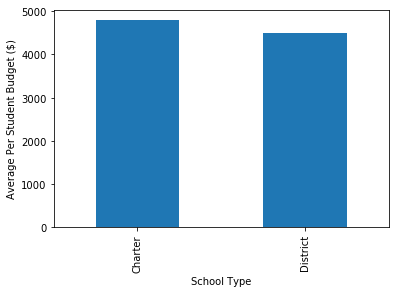

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Spending per student is almost the same for Charter and District schools - slightly more spending per student for Charter') 

CharterVsDistrict0['Per Student Budget'].plot.bar();
#plt.legend(loc='center left', bbox_to_anchor=(.5, .95));
plt.ylabel("Average Per Student Budget ($)");
plt.savefig('fig1.png', bbox_inches='tight')

In [23]:
CharterVsDistrict

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,90.363226,93.052812,91.708019
District,76.956733,80.966636,64.302528,78.324559,71.313543


Charter schools are performing better than District schools


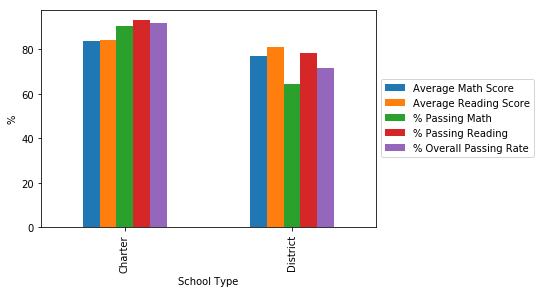

In [32]:
print('Charter schools are performing better than District schools') 


CharterVsDistrict.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.ylabel("%")
plt.savefig('fig2.png', bbox_inches='tight')

Higher spending not resulting improving grades and scores & negative correlation here but other factors may need to be considered


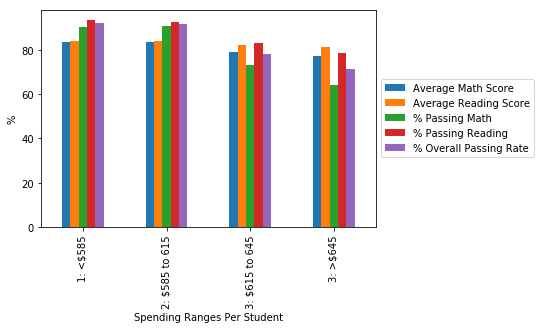

In [33]:
print('Higher spending not resulting improving grades and scores & negative correlation here but other factors may need to be considered')
By_School_Spending.plot.bar()

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.ylabel("%")
plt.savefig('fig3.png', bbox_inches='tight');

School Size have a positive impact on scores - small and medium school are scoring higher than large schools


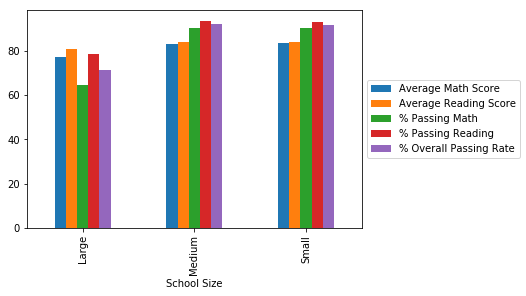

In [34]:
print('School Size have a positive impact on scores - small and medium school are scoring higher than large schools')
By_School_Size.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
#By_School_Size['% Overall Passing Rate'].plot.line()
plt.savefig('fig4.png', bbox_inches='tight');